In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv("D:/Machine learning/Practices/Data sets/cardio_train.csv",sep=';')

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
import seaborn as sn

In [7]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

c:\users\jobaear hossain\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

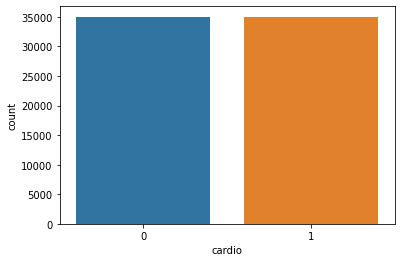

In [8]:
sn.countplot(data['cardio'])

In [9]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

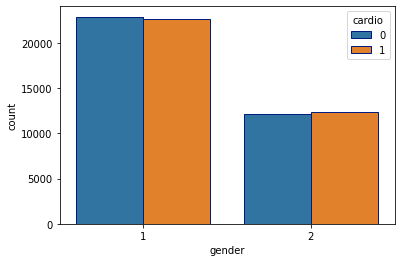

In [12]:
sn.countplot(x='gender',hue='cardio',data=data,edgecolor=sn.color_palette('dark',n_colors=1))

In [13]:
data['age_year'] = (data['age']/365).round(0)

In [14]:
data['age_year']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age_year, Length: 70000, dtype: float64

<AxesSubplot:xlabel='age_year', ylabel='count'>

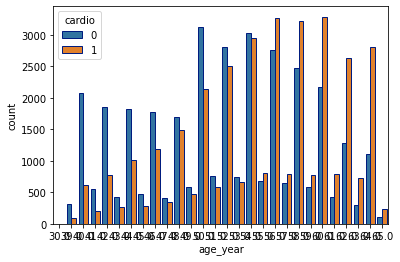

In [15]:
sn.countplot(x='age_year',hue='cardio',data=data,edgecolor=sn.color_palette('dark',n_colors=1))

In [16]:
data = data.drop(['age_year'],axis=1)

In [17]:
x = data.iloc[:,:-1]

In [18]:
x=x.drop(['id'],axis=1)

In [19]:
y = data.iloc[:,12:]

In [29]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [61]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier()

In [64]:
rfc.fit(xtrain,ytrain)

<ipython-input-64-6bd64776e0f5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain,ytrain)


RandomForestClassifier()

In [65]:
pred = rfc.predict(xtest)

In [66]:
rfc.score(xtest,ytest)

0.718

In [51]:
#from pandas import array
#pred = array[pred].reshape(-1,1)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtc = DecisionTreeClassifier()

In [75]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [77]:
pr = np.array([[12000,2,173,60,120,80,1,2,0,1,1]])


In [78]:
dtc.predict(pr)

array([1], dtype=int64)

In [79]:
dtc.score(xtest,ytest)

0.6356666666666667

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn = KNeighborsClassifier(n_neighbors = 12)

In [43]:
kn.fit(xtrain,ytrain)

c:\users\jobaear hossain\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [44]:
kn.score(xtrain,ytrain)

0.7428163265306122